# Nama : Muhammad Rifan Fathoni
# NIM : 2209106003
# POSTTEST 5

# SUPERVISED LEARNING

In [1]:
import pandas as pd

Keterangan : melakukan import library pandas sebagai pd

In [2]:
df = pd.read_csv("clean_Dataset.csv")

Keterangan : melakukan import dataset menggunakan fungsi pd.read_csv() bawaan pandas

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Keterangan : menghilangkan kolom unnamed: 0 yang tidak berguna

In [ ]:
from sklearn.model_selection import train_test_split

Keterangan : melakukan import library sklearn.model_selection(train_test_split)

In [ ]:
x = df[['duration','days_left']]
y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3)

Keterangan : melakukan train data dengan test data 30%

In [ ]:
from sklearn.linear_model import LinearRegression

Keterangan : melakukan import library sklearn.linier_model(LinierRegression)

In [ ]:
lr = LinearRegression()

Keterangan : menyimpan fungsi LinierRegression() kedalam variable lr sebagai alias

In [ ]:
lr.fit(X_train, Y_train)

In [ ]:
y_pred = lr.predict(X_test) 

Keterangan : membuat variable y_pred untuk menyimpan nilai prediksi dari test pada model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

Keterangan :
    Melakukan import library sklearn.metrics (mean_absolute_error, mean_squared_error,r2_score)
    melakukan import library numpy sebagai np

In [ ]:
print("MAE :", mean_absolute_error(Y_test, y_pred))
print("MSE :", mean_squared_error(Y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R-Squared :", r2_score(Y_test, y_pred))

keterangan : menampilkan nilai MAE,MSE,RMSE,R-Squared menggunakan fungsi bawaan skleaarn.metrics dan numpy

In [ ]:
import matplotlib.pyplot as plt

Keterangan : melakukan import library matplotlib.pyplot sebagai plt

In [ ]:
plt.scatter(X_test["duration"], Y_test, color="black")
plt.plot(X_test["duration"], y_pred, color="blue", linewidth=3)
plt.show()

Keterangan : menampilkan plot hasil prediksi

# Unsupervised Learning

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

keterangan :
    import library matplotlib.pyplot sebagai plt
    import library seaborn sebagai sns
    import library sklearn.cluster(KMeans)

In [5]:
X = df.iloc[:, -3:-1].values
X

array([[ 2.17,  1.  ],
       [ 2.33,  1.  ],
       [ 2.17,  1.  ],
       ...,
       [13.83, 49.  ],
       [10.  , 49.  ],
       [10.08, 49.  ]])

Keterangan :
    menyimpan data pada dua kolom sebelum terakhir pada variable X

In [7]:
wcss = []
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Keterangan:
    menginisialisasi list untuk menyimpan nilai WCSS tiap kelompok
    membuat loop untuk melatih algoritma K-Means

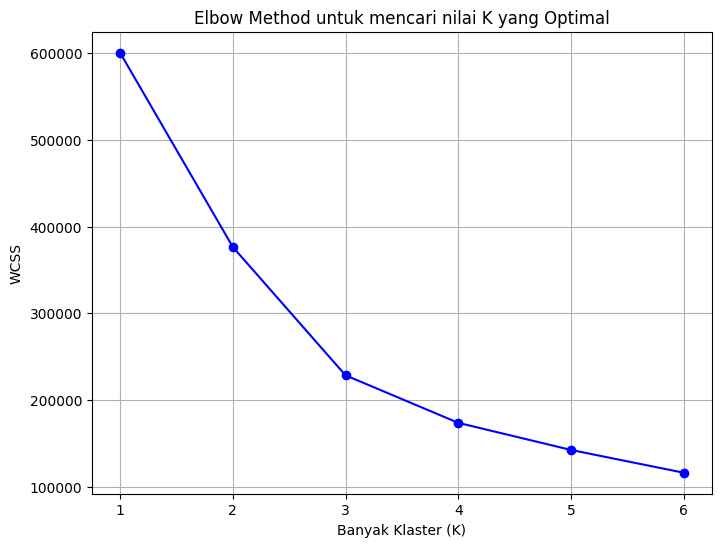

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Keterangan : Membuat grafik elbow method

In [9]:
K = 3

Keterangan :Pada grafik di atas, jumlah cluster terbaik adalah angka ke-3

In [10]:
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Keterangan :
    Inisialisasi K-Means
    Latih model K-Means berdasarkan data X

In [11]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

Keterangan :
    Label kelompok dari model
    Tambahkan kolom prediksi
    Titik pusat kelompok dari model

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

C:\Users\MSI Modern 14\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


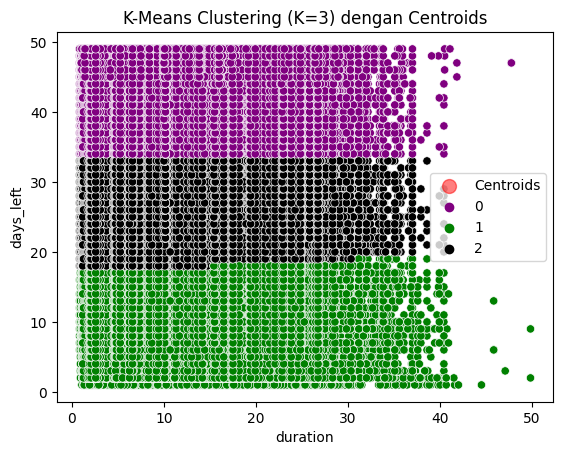

In [58]:
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df, x="duration", y="days_left",

hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("duration")
plt.ylabel("days_left")
plt.legend()
plt.show()

Keterangan : memvisualisasikan kelompok (kluster) dataset